# CATBOOST

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [2]:
# !pip install catboost

In [3]:
from catboost import CatBoostClassifier

In [4]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
# catb_model = CatBoostClassifier().fit(X_train, y_train)
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [6]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [8]:
# MODEL TUNNING

In [9]:
catb = CatBoostClassifier()

In [ ]:
# iterations --> Ağaç sayısı 

In [10]:
catb_params = {"iterations":[200, 500, 1000], "learning_rate":[0.01, 0.03,0.1], "depth":[4,5,8]}

In [11]:
catb_cv_model = GridSearchCV(catb, catb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.0min finished
0:	learn: 0.6863412	total: 20.4ms	remaining: 4.05s
1:	learn: 0.6811322	total: 24.4ms	remaining: 2.42s
2:	learn: 0.6753199	total: 29.6ms	remaining: 1.94s
3:	learn: 0.6697717	total: 34.1ms	remaining: 1.67s
4:	learn: 0.6642090	total: 38.4ms	remaining: 1.5s
5:	learn: 0.6577038	total: 42.4ms	remaining: 1.37s
6:	learn: 0.6522290	total: 46.9ms	remaining: 1.29s
7:	learn: 0.6466015	total: 51.1ms	remaining: 1.23s
8:	learn: 0.6408068	total: 55.4ms	remaining: 1.17s
9:	learn: 0.6358218	total: 60ms	remaining: 1.14s
10:	learn: 0.6300444	total: 64.6ms	remaining: 1.11s
11:	learn: 0.6240992	total: 68.8ms	remaining: 1.08s
12:	learn: 0.6196618	total: 73.3ms	remaining: 1.05s
13:

In [12]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [22]:
catb_tuned = CatBoostClassifier(depth=8, iterations=200,learning_rate=0.01).fit(X_train, y_train, verbose=False)

In [25]:
y_pred = catb_tuned.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [28]:
# DEĞİŞKENLERİN ÖNEM SIRALAMASI

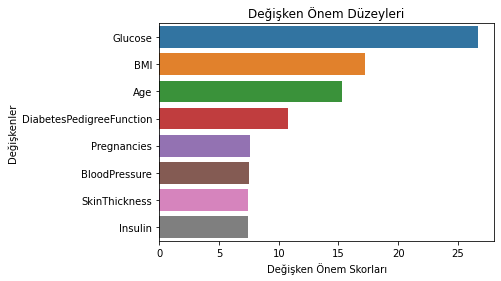

In [29]:
feature_imp = pd.Series(catb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

In [ ]:
# SON